<a href="https://colab.research.google.com/github/Arslonbekjon/ML-Amaliyot-Tashkent-uy-narxlari/blob/main/Amaliyot_tashkent_xomshyot_uchun.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

![Imgur](https://i.imgur.com/5pXzCIu.png)

# Data Science va Sun'iy Intellekt Praktikum

## 5-MODUL. Machine Learning

### Portfolio uchun vazifa: Toshkent shahrida uylarning narxini aniqlash.

Ushbu amaliyotda sizning vazifangiz berilgan ma`lumotlar asosida Toshkent shahridagi uylarning narxini aniqlash.

In [1]:
import pandas as pd
df = pd.read_csv('https://raw.githubusercontent.com/anvarnarz/praktikum_datasets/main/housing_data_08-02-2021.csv')
df.head()

,location,district,rooms,size,level,max_levels,price
0,"город Ташкент, Юнусабадский район, Юнусабад 8-...",Юнусабадский,3,57,4,4,52000
1,"город Ташкент, Яккасарайский район, 1-й тупик ...",Яккасарайский,2,52,4,5,56000
2,"город Ташкент, Чиланзарский район, Чиланзар 2-...",Чиланзарский,2,42,4,4,37000
3,"город Ташкент, Чиланзарский район, Чиланзар 9-...",Чиланзарский,3,65,1,4,49500
4,"город Ташкент, Чиланзарский район, площадь Актепа",Чиланзарский,3,70,3,5,55000


# Ustunlar ta'rifi
- `location` - sotilayotgan uy manzili
- `district` - uy joylashgan tuman
- `rooms` - xonalar soni
- `size` - uy maydoni (kv.m)
- `level` - uy joylashgan qavat
- `max_levels` - ja'mi qavatlar soni
- `price` - uy narxi

## Vazifani CRSIP-DM Metolodgiyasi yordamida bajaring.
<img src="https://i.imgur.com/dzZnnYi.png" alt="CRISP-DM" width="800"/>

In [2]:
import numpy as np
import sklearn
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df.head()

,location,district,rooms,size,level,max_levels,price
0,"город Ташкент, Юнусабадский район, Юнусабад 8-...",Юнусабадский,3,57,4,4,52000
1,"город Ташкент, Яккасарайский район, 1-й тупик ...",Яккасарайский,2,52,4,5,56000
2,"город Ташкент, Чиланзарский район, Чиланзар 2-...",Чиланзарский,2,42,4,4,37000
3,"город Ташкент, Чиланзарский район, Чиланзар 9-...",Чиланзарский,3,65,1,4,49500
4,"город Ташкент, Чиланзарский район, площадь Актепа",Чиланзарский,3,70,3,5,55000


In [4]:
df.shape

(7565, 7)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7565 entries, 0 to 7564
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   location    7565 non-null   object
 1   district    7565 non-null   object
 2   rooms       7565 non-null   int64 
 3   size        7565 non-null   object
 4   level       7565 non-null   int64 
 5   max_levels  7565 non-null   int64 
 6   price       7565 non-null   object
dtypes: int64(3), object(4)
memory usage: 413.8+ KB


In [6]:
df['district'].value_counts()

Чиланзарский         1641
Мирзо-Улугбекский    1382
Юнусабадский          883
Учтепинский           880
Мирабадский           773
Яккасарайский         658
Яшнободский           484
Шайхантахурский       396
Олмазорский           269
Сергелийский          175
Янгихаётский           16
Бектемирский            8
Name: district, dtype: int64

In [7]:
indexAge = df[ (df['price'] == 'Договорная') ].index
df.drop(indexAge , inplace=True)
df.head(15)

,location,district,rooms,size,level,max_levels,price
0,"город Ташкент, Юнусабадский район, Юнусабад 8-...",Юнусабадский,3,57,4,4,52000
1,"город Ташкент, Яккасарайский район, 1-й тупик ...",Яккасарайский,2,52,4,5,56000
2,"город Ташкент, Чиланзарский район, Чиланзар 2-...",Чиланзарский,2,42,4,4,37000
3,"город Ташкент, Чиланзарский район, Чиланзар 9-...",Чиланзарский,3,65,1,4,49500
4,"город Ташкент, Чиланзарский район, площадь Актепа",Чиланзарский,3,70,3,5,55000
5,"город Ташкент, Чиланзарский район, Чиланзар 6-...",Чиланзарский,1,28,1,4,25500
6,"город Ташкент, Чиланзарский район, Чиланзар-16",Чиланзарский,1,30,2,4,21200
7,"город Ташкент, Яккасарайский район, Саламатина",Яккасарайский,2,32,5,5,20000
8,"город Ташкент, Учтепинский район, Чиланзар-21",Учтепинский,2,51,3,4,26200
9,"город Ташкент, Чиланзарский район, Чиланзар-8",Чиланзарский,1,30,1,4,22200


In [8]:
df.shape

(7466, 7)

In [9]:
df['price']=df['price'].astype(float)

In [10]:
df

,location,district,rooms,size,level,max_levels,price
0,"город Ташкент, Юнусабадский район, Юнусабад 8-...",Юнусабадский,3,57,4,4,52000.0
1,"город Ташкент, Яккасарайский район, 1-й тупик ...",Яккасарайский,2,52,4,5,56000.0
2,"город Ташкент, Чиланзарский район, Чиланзар 2-...",Чиланзарский,2,42,4,4,37000.0
3,"город Ташкент, Чиланзарский район, Чиланзар 9-...",Чиланзарский,3,65,1,4,49500.0
4,"город Ташкент, Чиланзарский район, площадь Актепа",Чиланзарский,3,70,3,5,55000.0
...,...,...,...,...,...,...,...
7560,"город Ташкент, Яшнободский район, Городок Авиа...",Яшнободский,1,38,5,5,24500.0
7561,"город Ташкент, Яшнободский район, 1-й проезд А...",Яшнободский,2,49,1,4,32000.0
7562,"город Ташкент, Шайхантахурский район, Зульфиях...",Шайхантахурский,2,64,3,9,40000.0
7563,"город Ташкент, Мирзо-Улугбекский район, Буюк И...",Мирзо-Улугбекский,1,18,1,4,11000.0


In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7466 entries, 0 to 7564
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   location    7466 non-null   object 
 1   district    7466 non-null   object 
 2   rooms       7466 non-null   int64  
 3   size        7466 non-null   object 
 4   level       7466 non-null   int64  
 5   max_levels  7466 non-null   int64  
 6   price       7466 non-null   float64
dtypes: float64(1), int64(3), object(3)
memory usage: 466.6+ KB


In [12]:
#df['size']=df['size'].astype(float)

In [13]:
dfsize=df[df['size']=='Площадьземли:1сот']
dfsize

,location,district,rooms,size,level,max_levels,price
5347,"город Ташкент, Яшнободский район, Дархон",Яшнободский,4,Площадьземли:1сот,3,5,150000.0


In [14]:
indexsize = df[ (df['size'] == 'Площадьземли:1сот') ].index
df.drop(indexsize , inplace=True)
df.head(15)

,location,district,rooms,size,level,max_levels,price
0,"город Ташкент, Юнусабадский район, Юнусабад 8-...",Юнусабадский,3,57,4,4,52000.0
1,"город Ташкент, Яккасарайский район, 1-й тупик ...",Яккасарайский,2,52,4,5,56000.0
2,"город Ташкент, Чиланзарский район, Чиланзар 2-...",Чиланзарский,2,42,4,4,37000.0
3,"город Ташкент, Чиланзарский район, Чиланзар 9-...",Чиланзарский,3,65,1,4,49500.0
4,"город Ташкент, Чиланзарский район, площадь Актепа",Чиланзарский,3,70,3,5,55000.0
5,"город Ташкент, Чиланзарский район, Чиланзар 6-...",Чиланзарский,1,28,1,4,25500.0
6,"город Ташкент, Чиланзарский район, Чиланзар-16",Чиланзарский,1,30,2,4,21200.0
7,"город Ташкент, Яккасарайский район, Саламатина",Яккасарайский,2,32,5,5,20000.0
8,"город Ташкент, Учтепинский район, Чиланзар-21",Учтепинский,2,51,3,4,26200.0
9,"город Ташкент, Чиланзарский район, Чиланзар-8",Чиланзарский,1,30,1,4,22200.0


In [15]:
df['size']=df['size'].astype(float)

In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7465 entries, 0 to 7564
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   location    7465 non-null   object 
 1   district    7465 non-null   object 
 2   rooms       7465 non-null   int64  
 3   size        7465 non-null   float64
 4   level       7465 non-null   int64  
 5   max_levels  7465 non-null   int64  
 6   price       7465 non-null   float64
dtypes: float64(2), int64(3), object(2)
memory usage: 466.6+ KB


In [17]:
df.describe()

,rooms,size,level,max_levels,price
count,7465.000000,7465.000000,7465.000000,7465.000000,7.465000e+03
mean,2.622103,113.537018,3.693771,6.023979,7.132367e+04
std,1.083155,1501.157996,2.236905,2.607103,6.405659e+05
min,1.000000,1.000000,1.000000,1.000000,2.000000e+00
25%,2.000000,50.000000,2.000000,4.000000,3.500000e+04
50%,3.000000,65.000000,3.000000,5.000000,4.650000e+04
75%,3.000000,85.000000,5.000000,9.000000,6.700000e+04
max,10.000000,70000.000000,19.000000,25.000000,5.200000e+07


In [18]:
df.shape

(7465, 7)

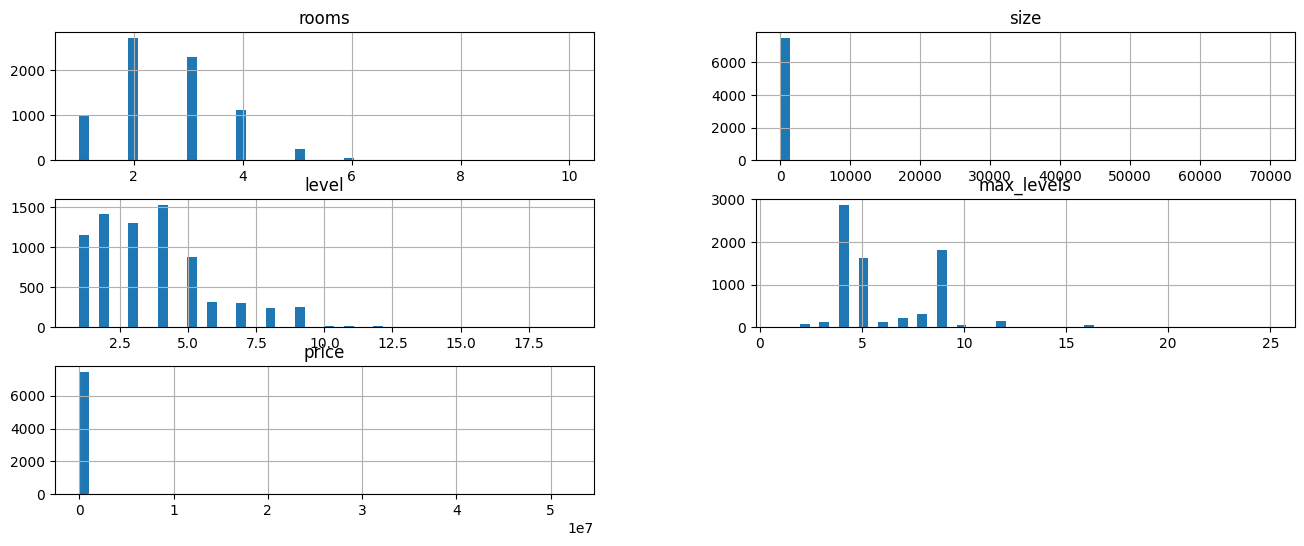

In [19]:
%matplotlib inline
df.hist(bins=50, figsize=(16,6))
plt.show()

In [20]:
df['size'].describe()

count     7465.000000
mean       113.537018
std       1501.157996
min          1.000000
25%         50.000000
50%         65.000000
75%         85.000000
max      70000.000000
Name: size, dtype: float64

In [21]:
#dfsized=df[df['size']<1000].index
#df.drop(dfsized,inplace=True)
#df.shape

In [22]:
#df['size'].shape

In [23]:
df.describe()

,rooms,size,level,max_levels,price
count,7465.000000,7465.000000,7465.000000,7465.000000,7.465000e+03
mean,2.622103,113.537018,3.693771,6.023979,7.132367e+04
std,1.083155,1501.157996,2.236905,2.607103,6.405659e+05
min,1.000000,1.000000,1.000000,1.000000,2.000000e+00
25%,2.000000,50.000000,2.000000,4.000000,3.500000e+04
50%,3.000000,65.000000,3.000000,5.000000,4.650000e+04
75%,3.000000,85.000000,5.000000,9.000000,6.700000e+04
max,10.000000,70000.000000,19.000000,25.000000,5.200000e+07


In [24]:
df['size'].max()

70000.0

In [25]:
dfsized=df[df['size']==70000].index
df.drop(dfsized,inplace=True)
df['size'].max()

69000.0

In [26]:
dfsiz=df[df['size']==69000].index
df.drop(dfsiz,inplace=True)
df['size'].max()

67000.0

In [27]:
dfsi=df[df['size']==67000].index
df.drop(dfsi,inplace=True)
df['size'].max()

44000.0

In [28]:
dfs=df[df['size']==44000].index
df.drop(dfs,inplace=True)
df['size'].max()

24500.0

In [29]:
dfsizedw=df[df['size']==24500].index
df.drop(dfsizedw,inplace=True)
df['size'].max()

7407.0

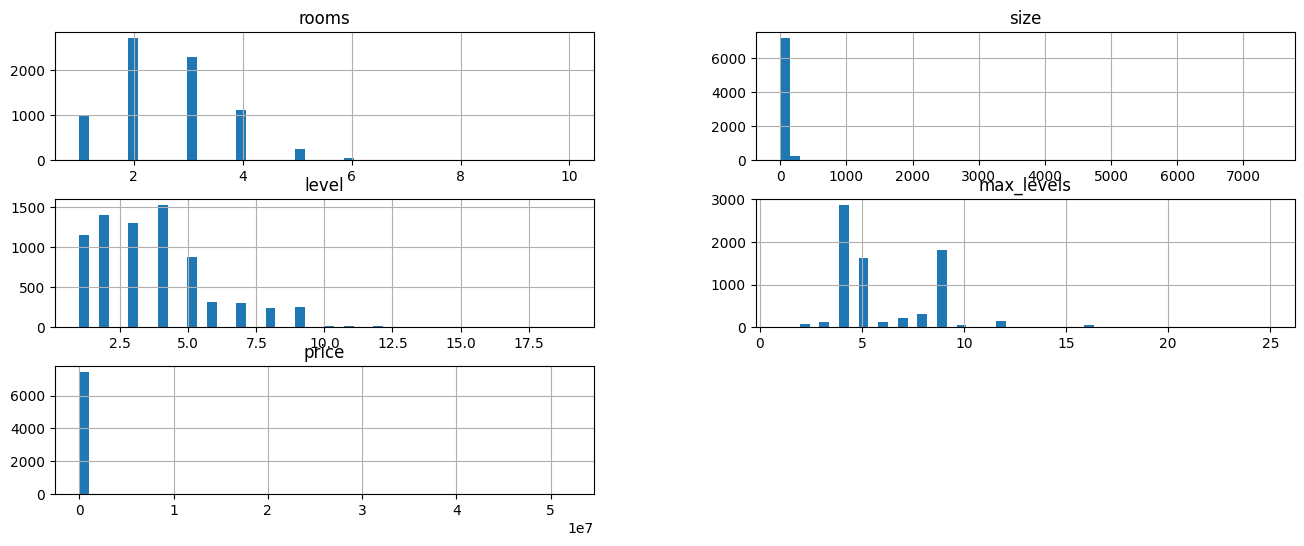

In [30]:
%matplotlib inline
df.hist(bins=50, figsize=(16,6))
plt.show()

In [31]:
dfsizedww=df[df['size']==7407].index
df.drop(dfsizedww,inplace=True)
df['size'].max()

7359.0

In [32]:
dfsizedwe=df[df['size']==7359].index
df.drop(dfsizedwe,inplace=True)
df['size'].max()

3448.0

In [33]:
dfsizedwa=df[df['size']==3448].index
df.drop(dfsizedwa,inplace=True)
df['size'].max()

2100.0

In [34]:
dfsizedws=df[df['size']==2100].index
df.drop(dfsizedws,inplace=True)
df['size'].max()

500.0

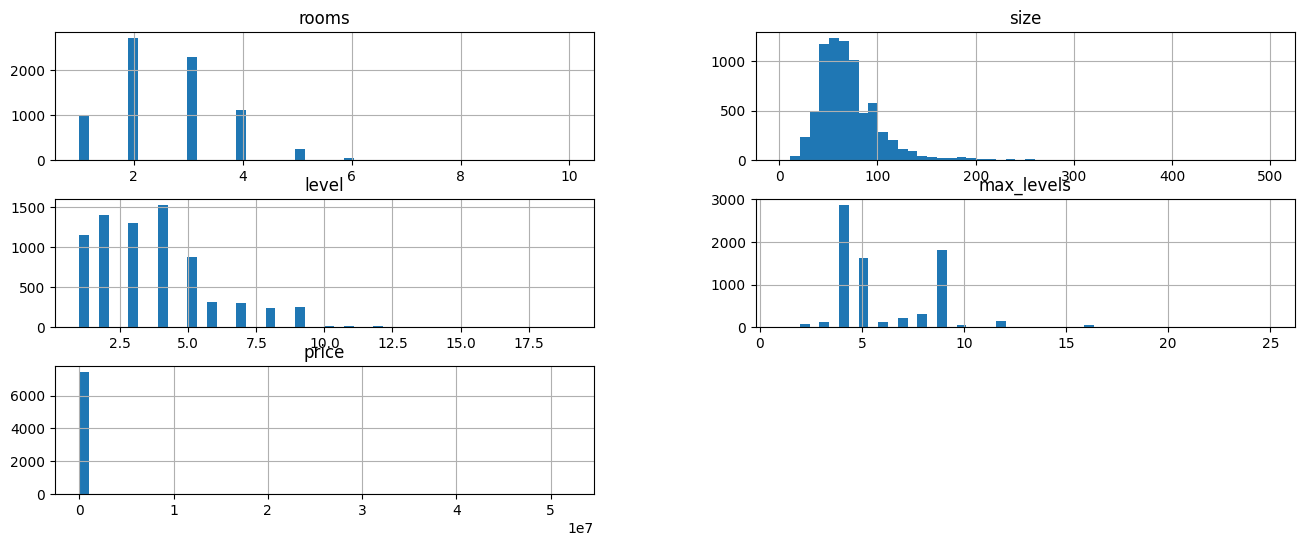

In [35]:
%matplotlib inline
df.hist(bins=50, figsize=(16,6))
plt.show()

In [36]:
dfsizedwq=df[df['size']==500].index
df.drop(dfsizedwq,inplace=True)
df['size'].max()

456.0

In [37]:
dfsizedwz=df[df['size']==456].index
df.drop(dfsizedwz,inplace=True)
df['size'].max()

448.0

In [38]:
dfsizedwd=df[df['size']==448].index
df.drop(dfsizedwd,inplace=True)
df['size'].max()

420.0

In [39]:
dfsizedwf=df[df['size']==420].index
df.drop(dfsizedwf,inplace=True)
df['size'].max()

400.0

In [40]:
dfsizedwc=df[df['size']==400].index
df.drop(dfsizedwc,inplace=True)
df['size'].max()

360.0

In [41]:
dfsizedwn=df[df['size']==360].index
df.drop(dfsizedwn,inplace=True)
df['size'].max()

350.0

In [42]:
dfsizedwh=df[df['size']==350].index
df.drop(dfsizedwh,inplace=True)
df['size'].max()

347.0

In [43]:
dfsizedwj=df[df['size']==347].index
df.drop(dfsizedwj,inplace=True)
df['size'].max()

341.0

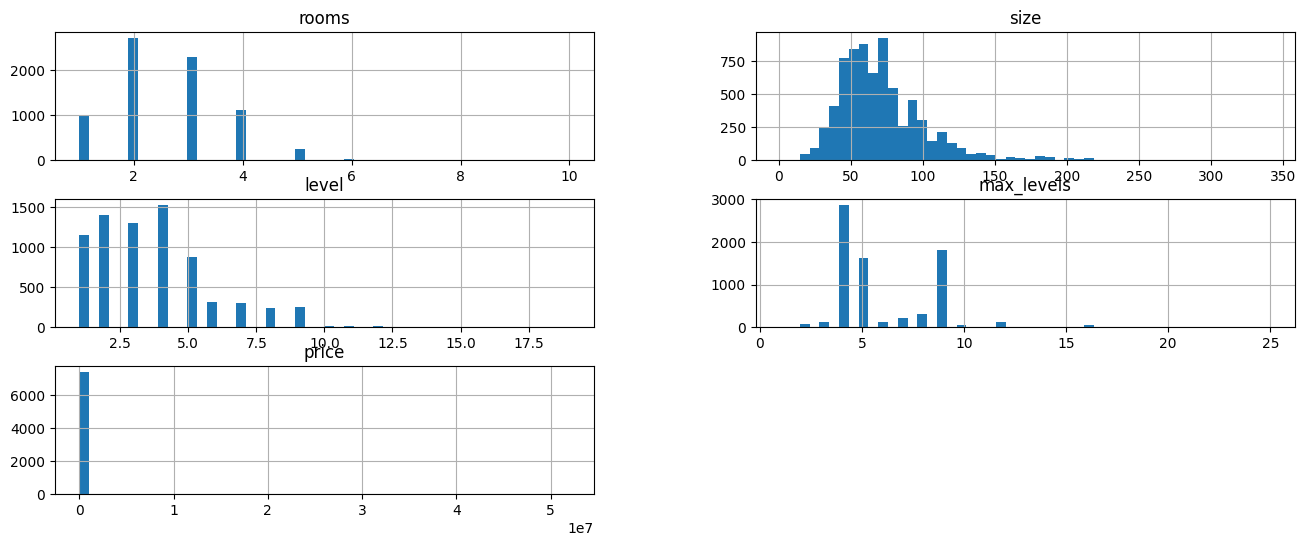

In [44]:
%matplotlib inline
df.hist(bins=50, figsize=(16,6))
plt.show()

In [45]:
df.shape

(7443, 7)

In [46]:
newdfsz=df[df['size']>150].index
df.drop(newdfsz,inplace=True)
df['size'].max()

150.0

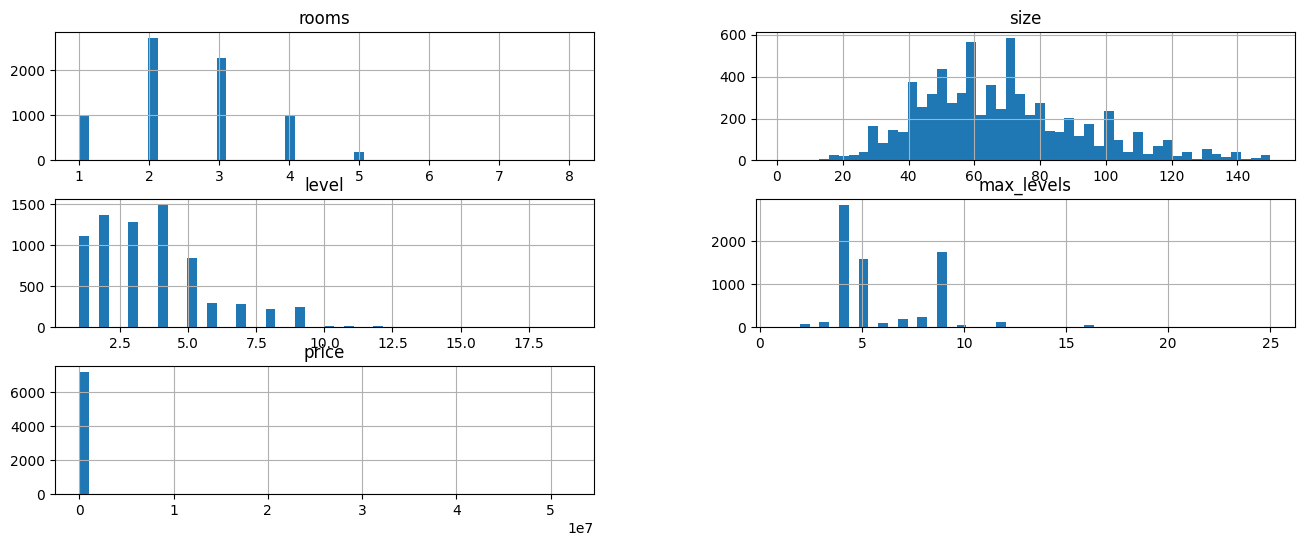

In [47]:
%matplotlib inline
df.hist(bins=50, figsize=(16,6))
plt.show()

In [48]:
from sklearn.model_selection import train_test_split
train_set, test_set = train_test_split(df, test_size=0.2, random_state=42)

In [49]:
test_set

,location,district,rooms,size,level,max_levels,price
316,"город Ташкент, Мирзо-Улугбекский район, Академ...",Мирзо-Улугбекский,2,56.0,1,4,35000.0
391,"город Ташкент, Мирабадский район, СЕВЕРНЫЙ ВОК...",Мирабадский,2,40.0,1,1,23500.0
6011,"город Ташкент, Мирзо-Улугбекский район, Аккурган",Мирзо-Улугбекский,2,53.0,4,4,37000.0
2415,"город Ташкент, Яккасарайский район, Мукими",Яккасарайский,3,67.0,4,4,52000.0
255,"город Ташкент, Мирзо-Улугбекский район, Карасу...",Мирзо-Улугбекский,2,63.0,5,5,35000.0
...,...,...,...,...,...,...,...
3035,"город Ташкент, Мирзо-Улугбекский район, Городо...",Мирзо-Улугбекский,1,38.0,3,4,22000.0
4825,"город Ташкент, Чиланзарский район, Чиланзар-16",Чиланзарский,3,70.0,1,4,46500.0
6767,"город Ташкент, Юнусабадский район, Чингиза Айт...",Юнусабадский,3,63.0,2,5,73000.0
5830,"город Ташкент, Мирзо-Улугбекский район, жилой ...",Мирзо-Улугбекский,2,66.4,2,8,55000.0


In [50]:
housing = train_set.copy()
housing.head()

,location,district,rooms,size,level,max_levels,price
2649,"город Ташкент, Мирабадский район, Абдурауфа Фи...",Мирабадский,2,32.00,1,5,17500.0
947,"город Ташкент, Чиланзарский район, Чиланзар",Чиланзарский,2,60.00,2,9,42500.0
6870,"город Ташкент, Шайхантахурский район, Улица Бе...",Шайхантахурский,3,68.41,4,9,56000.0
6009,"город Ташкент, Шайхантахурский район, Лабзак",Шайхантахурский,2,65.00,3,4,56500.0
7165,"город Ташкент, Юнусабадский район, 1-й проезд ...",Юнусабадский,2,60.00,4,4,40000.0


In [51]:
housing.describe()

,rooms,size,level,max_levels,price
count,5770.000000,5770.000000,5770.000000,5770.000000,5.770000e+03
mean,2.543328,68.238066,3.680069,5.988215,6.783664e+04
std,1.000751,25.234885,2.228241,2.616706,7.218944e+05
min,1.000000,1.000000,1.000000,1.000000,2.000000e+00
25%,2.000000,50.000000,2.000000,4.000000,3.450000e+04
50%,2.000000,65.000000,3.000000,5.000000,4.500000e+04
75%,3.000000,82.000000,5.000000,9.000000,6.400000e+04
max,8.000000,150.000000,19.000000,25.000000,5.200000e+07


In [52]:
#Error
#housing.plot(kind='hist',x='size', y='level', figsize=(9,6))

In [53]:
housing.corrwith(housing['price']).sort_values(ascending=False)

<ipython-input-53-c75fa4bad25c>:1: FutureWarning: The default value of numeric_only in DataFrame.corrwith is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  housing.corrwith(housing['price']).sort_values(ascending=False)


price         1.000000
rooms         0.042815
size          0.040864
max_levels    0.006041
level        -0.003812
dtype: float64

In [54]:
housing['location'].value_counts()

город Ташкент, Яккасарайский район, Кушбеги                          99
город Ташкент, Чиланзарский район, Чиланзар                          86
город Ташкент, Мирзо-Улугбекский район, Буюк Ипак Йули               63
город Ташкент, Чиланзарский район, Чиланзар 2-й квартал              62
город Ташкент, Учтепинский район, Чиланзар 24-й квартал              61
                                                                     ..
город Ташкент, Юнусабадский район, Юнусобод 4                         1
город Ташкент, Юнусабадский район, 1-й проезд Бахор                   1
город Ташкент, Мирзо-Улугбекский район, Лашкарбеги                    1
город Ташкент, Мирзо-Улугбекский район, Новомосковкая Голден Хаус     1
город Ташкент, Олмазорский район, hurriyat 75                         1
Name: location, Length: 1315, dtype: int64

In [55]:
housing['newcolumn_loc'] = housing[['district']].replace({'Чиланзарский':1000,"Мирзо-Улугбекский":76,"Учтепинский":65,"Юнусабадский":57,"Мирабадский":48,"Яккасарайский":37,"Яшнободский":26,"Шайхантахурский":15,"Олмазорский":4,"Сергелийский":3,"Янгихаётский":2,"Бектемирский":1})

In [56]:
housing['district'].value_counts()

Чиланзарский         1291
Мирзо-Улугбекский    1038
Учтепинский           696
Юнусабадский          686
Мирабадский           553
Яккасарайский         510
Яшнободский           357
Шайхантахурский       286
Олмазорский           207
Сергелийский          127
Янгихаётский           11
Бектемирский            8
Name: district, dtype: int64

In [57]:
housing

,location,district,rooms,size,level,max_levels,price,newcolumn_loc
2649,"город Ташкент, Мирабадский район, Абдурауфа Фи...",Мирабадский,2,32.00,1,5,17500.0,48
947,"город Ташкент, Чиланзарский район, Чиланзар",Чиланзарский,2,60.00,2,9,42500.0,1000
6870,"город Ташкент, Шайхантахурский район, Улица Бе...",Шайхантахурский,3,68.41,4,9,56000.0,15
6009,"город Ташкент, Шайхантахурский район, Лабзак",Шайхантахурский,2,65.00,3,4,56500.0,15
7165,"город Ташкент, Юнусабадский район, 1-й проезд ...",Юнусабадский,2,60.00,4,4,40000.0,57
...,...,...,...,...,...,...,...,...
3963,"город Ташкент, Яккасарайский район, Дамарик",Яккасарайский,3,70.00,4,5,68000.0,37
5458,"город Ташкент, Яккасарайский район, Конституция",Яккасарайский,1,29.00,7,9,15682.0,37
5494,"город Ташкент, Чиланзарский район, Новза",Чиланзарский,4,125.00,6,9,250000.0,1000
5661,"город Ташкент, Мирабадский район, Тараса Шевченко",Мирабадский,3,77.60,4,5,65000.0,48


In [58]:
housing.corrwith(housing['price']).sort_values(ascending=False)

<ipython-input-58-c75fa4bad25c>:1: FutureWarning: The default value of numeric_only in DataFrame.corrwith is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  housing.corrwith(housing['price']).sort_values(ascending=False)


price            1.000000
rooms            0.042815
size             0.040864
max_levels       0.006041
level           -0.003812
newcolumn_loc   -0.011455
dtype: float64